In [1]:
import os, sys
import pandas as pd
import numpy as np

from utils.method import read_bic_table, make_consensus_biclusters, write_bic_table
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
in_dir = "results_on_real_data_WGCNA/" 
out_dir = "results_on_real_data_tuned_parameters/"

seeds = [116739,26225,288389,670487,777572]
suffix = ".bin=kmeans,pval=0.01,clust=WGCNA,ds=0,dch=0.995" # max average % of matched biclusters
dataset = "TCGA"#"METABRIC" # "TCGA"

#exprs = pd.read_csv("data/preprocessed_v6/METABRIC_1904_17Kgenes.log2_exprs_z_v6.tsv", sep="\t",index_col=0)
exprs = pd.read_csv("data/preprocessed_v6/TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.log2_exprs_z_v6.tsv", sep="\t",index_col=0)

In [3]:
biclusters = []
for seed in seeds:
    df = read_bic_table(in_dir+dataset+".seed="+str(seed)+suffix+".biclusters.tsv")
    df = df.drop_duplicates(subset =  ["n_genes","n_samples","SNR","e_pval","direction"])
    print("seed %s n biclusters: %s"%(seed,df.shape[0]))
    df.index = ["seed="+str(seed)+"_"+str(x) for x in df.index.values ]
    
    biclusters.append(df)


seed 116739 n biclusters: 43
seed 26225 n biclusters: 41
seed 288389 n biclusters: 43
seed 670487 n biclusters: 41
seed 777572 n biclusters: 38


7 s for similarity matrix
	Running Louvain ...
	curve type: increasing


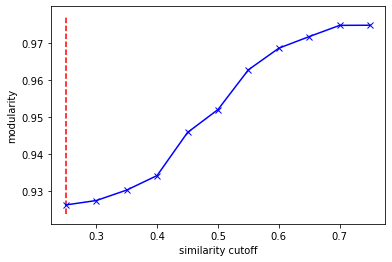

	Louvain runtime: modules detected in 0.22 s.
	modules: 40, not clustered features 5 
		similarity cutoff: 0.25 modularity: 0.926
biclusters found in 2+ runs: 40 in less then 2 runs: 5
28 s for making consensus biclusters from consensus gene sets


In [4]:
# now biclusters is a list of dataframes that will be merged and re-indexed 
consensus_biclusters = make_consensus_biclusters(biclusters, exprs, 
                                                      method = "kmeans",
                                                      similarity = "both", ## "samples", "genes" ,"both"
                                                      seed = 42,plot = False)
write_bic_table(consensus_biclusters,out_dir+dataset+".consensus_kmeans_v2.42"+suffix+".tsv")

In [5]:
i=20
print(" ".join(sorted(consensus_biclusters.loc[i,"genes"])))
#print()
#print(" ".join(sorted(consensus_biclusters.loc[i,"samples"])))
consensus_biclusters

AADAC ABCB5 ACSM2A ACSM2B ADCY5 ADGRG4 ADH1A ADH1C ADH4 ADRB3 ALDH1L1 ALLC ANGPTL5 ANGPTL8 ANKRD29 APOB AQP10 AQP7 AQP7P1 BHMT C14orf180 C16orf89 C22orf31 C6 C7 CA4 CACNA1G-AS1 CAVIN2 CCDC178 CCL16 CCL21 CFHR1 CHRDL1 CIDEA CIDEC CLDN11 CLDN15 CLEC4G CLEC4GP1 CMA1 CNTFR COL14A1 CPA1 CRHR2 CSF3 CSN1S1 CTSG CYP26C1 CYP4F12 DBX2 DLGAP2 DNM1P46 DRD1 EGFL7 EGR1 ELANE ENAM EPB42 FABP4 FAM180B FBXO40 FGF16 FGF20 FOSB FRMD1 FXYD1 GABRA2 GABRG1 GALR1 GATA1 GDF10 GLI1 GLYAT GPD1 GRM7 HCG22 HEPACAM HP IGF2-AS IGFN1 KCNA1 KCNA4 KCNIP2 KCNK10 KCNS2 KHDRBS2 KLHL33 KRT1 KRT27 LCN10 LCN6 LEP LGALS12 LINC01366 LRRC77P LRRTM1 LUZP2 MAOA MAP1LC3C MAS1L MMP27 MRAP MRGPRX2 MROH2B MYH8 MYOC NAP1L2 NEFL NEFM NGFR NR4A1 NRXN2 NWD2 OR3A2 OR5K2 OR7E12P OTC OXT PCK1 PCOLCE2 PER1 PGA3 PI16 PLCXD3 PLIN1 PLIN4 PPP1R1A PRG4 PRL RASIP1 RBP4 RBP7 RCVRN RD3 RFPL4B RHOXF1 SBK3 SCARA5 SCN2B SCTR SEL1L2 SERTM2 SHISA3 SLC22A12 SLC7A10 SNTG2 SOCS2 SOCS2-AS1 SPX TAC1 TCEAL6 TCF21 TCF23 TEX26 TGFBR3 THRSP TMEM132C TMEM215 TMEM

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
0,2.820948,122,13,"{DMBT1L1, OR2AT4, OR51M1, OR52H1, OR11L1, SNOR...","{TCGA-AC-A3QQ-01, TCGA-A7-A26I-01, TCGA-A7-A26...","{DMBT1L1, OR2AT4, OR51M1, OR52H1, OR11L1, SNOR...",{},"{8194, 10251, 13836, 13838, 15375, 2063, 2065,...","{130, 131, 132, 133, 262, 135, 137, 138, 268, ...",UP,5
1,2.647958,69,44,"{SPRR4, SCEL, SPRR2A, TMPRSS11B, NR0B1, SPRR2F...","{TCGA-AO-A0JE-01, TCGA-E2-A1LK-01, TCGA-BH-A0B...","{SPRR4, SCEL, SPRR2A, TMPRSS11B, NR0B1, SPRR2F...",{},"{5888, 10752, 5250, 7555, 3971, 8326, 7567, 75...","{128, 1024, 515, 132, 518, 519, 264, 138, 523,...",UP,5
2,2.600729,15,29,"{UTY, NLGN4Y, RPS4Y1, EIF1AY, IL36A, ZFY, LINC...","{TCGA-AO-A0JE-01, TCGA-BH-A0B8-01, TCGA-A2-A0E...","{UTY, NLGN4Y, RPS4Y1, EIF1AY, IL36A, UPK1B, LI...",{},"{2144, 16674, 3714, 16037, 9, 16138, 7309, 126...","{128, 515, 518, 519, 138, 523, 542, 550, 39, 1...",UP,5
3,2.232559,347,242,"{CLSTN2, PXMP4, MLPH, NEK5, TTC6, ZSCAN1, DNMB...","{TCGA-E2-A1LK-01, TCGA-C8-A137-01, TCGA-AR-A0T...",{},"{CLSTN2, PXMP4, MLPH, NEK5, TTC6, ZSCAN1, DNMB...","{16385, 4100, 14345, 2058, 16398, 2069, 25, 20...","{1024, 514, 515, 1018, 1030, 519, 8, 1035, 524...",DOWN,5
4,2.207666,410,204,"{WNK3, PADI2, CWH43, RTP3, PCDH8, HELT, LOC388...","{TCGA-E2-A1LK-01, TCGA-AR-A0TU-01, TCGA-EW-A6S...","{WNK3, PADI2, CWH43, RTP3, PCDH8, HELT, LOC388...",{},"{12288, 4108, 16397, 15, 14358, 16411, 6172, 3...","{1024, 514, 1018, 1030, 519, 8, 1035, 524, 102...",UP,5
5,2.130354,10,45,"{ACTL6B, PPM1E, SYT4, CYP2A6, CHGA, CDK5R2, CH...","{TCGA-BH-A1FR-01, TCGA-BH-A0B8-01, TCGA-E2-A14...","{ACTL6B, PPM1E, SYT4, CYP2A6, CHGA, CDK5R2, CH...",{},"{13121, 2469, 202, 11307, 3532, 3196, 14517, 1...","{0, 643, 132, 523, 399, 16, 784, 146, 915, 148...",UP,3
6,1.918735,5,274,"{HOXC13, HOXC10, HOTAIR, HOXC11, MNX1}","{TCGA-BH-A1FR-01, TCGA-A7-A3IZ-01, TCGA-A8-A06...",{},"{MNX1, HOXC10, HOTAIR, HOXC11, HOXC13}","{6505, 6506, 6508, 6483, 8859}","{2, 516, 5, 1032, 1033, 523, 13, 14, 527, 529,...",DOWN,5
7,1.850627,153,333,"{IQUB, POTEC, KCNC2, GLRA3, NLRP8, GNG13, INSY...","{TCGA-E2-A1LK-01, TCGA-AR-A0TU-01, TCGA-D8-A1X...",{},"{IQUB, POTEC, KCNC2, GLRA3, NLRP8, GNG13, INSY...","{1528, 1032, 1044, 7195, 11803, 1055, 7204, 72...","{1, 8, 13, 14, 16, 18, 19, 22, 23, 25, 26, 28,...",DOWN,5
8,1.839132,6,39,"{PRAMEF12, PRAMEF8, CT45A3, PRAMEF1, CT45A5, C...","{TCGA-GM-A2DB-01, TCGA-A8-A07R-01, TCGA-BH-A0B...","{PRAMEF12, PRAMEF8, CT45A3, PRAMEF1, CT45A5, C...",{},"{11406, 11407, 11409, 3378, 3379, 3380}","{132, 260, 774, 777, 522, 1035, 396, 141, 398,...",UP,5
9,1.793055,11,5,"{LCE2D, LCE1E, LCE2A, LCE1F, LCE6A, LCE2C, LCE...","{TCGA-A2-A3XW-01, TCGA-E9-A295-01, TCGA-AC-A2Q...","{LCE2D, LCE1E, LCE2A, LCE1F, LCE6A, LCE2C, LCE...",{},"{7688, 7689, 7690, 7691, 7692, 7693, 7694, 769...","{264, 111, 560, 920, 511}",UP,5


In [6]:
# HER2+ subtype
" ".join(sorted(consensus_biclusters[consensus_biclusters["genes"].apply(lambda x: "ERBB2" in x)]["genes"].values[0]))

'ABCC12 BPIFA2 BPIFA4P BRINP3 C2CD4A C8B CLCA2 CPB2 CRYM DMRTC2 EPO ERBB2 F9 FGB FGG FMO9P FSIP2 GGTLC1 GLYCAM1 GRB7 KRT24 KU-MEL-3 LDC1P LINC02593 LINC02906 LYPD4 LYZL4 MIEN1 MUC19 MYPN NOTO ODF4 ORMDL3 OTOR PGAP3 PNLIPRP3 PSMD3 RNASE12 SAMD11 SPINK8 STARD3 SULT1C2P1 SULT1C3 TERB2 UGT2B10 UGT2B11 UGT2B28 ZP2'

In [7]:
# neuro-endocrine subtype
" ".join(sorted(consensus_biclusters[consensus_biclusters["genes"].apply(lambda x: "CHGA" in x)]["genes"].values[0]))

'ACTL6B CDK5R2 CHGA CHGB CPLX2 CYP2A6 PPM1E SEZ6 SVOP SYT4'

In [8]:
consensus_biclusters.loc[consensus_biclusters["detected_n_times"]==1,:]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
16,1.566755,4,359,"{CFB, C4A, CYP21A2, C4B}","{TCGA-A1-A0SG-01, TCGA-AR-A0TU-01, TCGA-E2-A1L...",{},"{CFB, C4A, CYP21A2, C4B}","{2657, 1786, 1787, 3524}","{1, 7, 8, 12, 16, 17, 18, 19, 20, 24, 25, 26, ...",DOWN,1
17,1.550308,2,261,"{IFITM5, PGGHG}","{TCGA-A2-A25D-01, TCGA-OL-A5RX-01, TCGA-A1-A0S...","{IFITM5, PGGHG}",{},"{6720, 10746}","{0, 1, 1025, 1027, 5, 7, 1019, 10, 1034, 12, 1...",UP,1
23,1.508496,27,258,"{ADAM2, APOC3, ZG16, SFTPA2, ASH2L, ALOX15, FA...","{TCGA-BH-A209-01, TCGA-A1-A0SG-01, TCGA-A7-A3I...","{ADAM2, APOC3, ZG16, SFTPA2, ASH2L, ALOX15, FA...",{},"{4864, 3334, 8201, 6040, 1053, 7973, 7210, 166...","{1025, 2, 513, 518, 1031, 7, 9, 523, 12, 15, 1...",UP,1
29,1.467654,12,271,"{LTO1, TCL1B, NDST4, PTH2, PPFIA1, KRT24, DQX1...","{TCGA-BH-A0BC-01, TCGA-A7-A3IZ-01, TCGA-B6-A0I...","{LTO1, TCL1B, NDST4, PTH2, PPFIA1, KRT24, DQX1...",{},"{15266, 8233, 9450, 12157, 7086, 3439, 11726, ...","{0, 1, 518, 7, 10, 511, 526, 15, 527, 1038, 10...",UP,1
43,1.349282,15,480,"{GOLGA6A, PVALEF, PKLR, RNF167, LINC01342, PDZ...","{TCGA-A1-A0SG-01, TCGA-B6-A0IG-01, TCGA-E2-A1L...","{GOLGA6A, PVALEF, PKLR, RNF167, LINC01342, PDZ...",{},"{7909, 10663, 10793, 10122, 2123, 4060, 12429,...","{0, 1, 2, 3, 5, 6, 7, 8, 11, 12, 21, 22, 31, 3...",UP,1


In [9]:
from utils.eval import calculate_perfromance,make_ref_groups

In [12]:
classifications={"Intrinsic":["Luminal","Basal","Her2","Normal","Claudin-low"],
                "SCMOD2":["ER-/HER2-","ER+/HER2- Low Prolif","ER+/HER2- High Prolif","HER2+"],
                "IHC":["IHC_TNBC","IHC_ER","IHC_HER2","IHC_PR"]}

subtypes = pd.read_csv("data/preprocessed_v6/TCGA-BRCA_1079_17Kgenes.Xena_TCGA_PanCan.subtypes_and_signatures_v6.tsv",sep = "\t",index_col=0)
annotation = pd.read_csv("data/preprocessed_v6/TCGA-BRCA_1079.Xena_TCGA_PanCan.annotation_v6.tsv",sep = "\t",index_col=0)
#subtypes = pd.read_csv("data/preprocessed_v6/METABRIC_1904_17Kgenes.subtypes_and_signatures_v6.tsv",sep = "\t",index_col=0)
#annotation = pd.read_csv("data/preprocessed_v6/METABRIC_1904.annotation_v6.tsv",sep = "\t",index_col=0)

exprs[exprs>3] = 3
exprs[exprs<-3] = -3

subtypes = subtypes.loc[exprs.columns.values,:]
annotation = annotation.loc[exprs.columns.values,:]

known_groups, freqs = make_ref_groups(subtypes, annotation,exprs)

In [13]:
# METABRIC
performances = {}
for seed in range(0,5):
    p = calculate_perfromance(biclusters[seed], 
                                    known_groups,freqs,
                                    set(exprs.columns.values),
                                    classifications=classifications)
    performances[seed] = p
performances["consensus"] = calculate_perfromance(consensus_biclusters, 
                                    known_groups,freqs,
                                    set(exprs.columns.values),
                                    classifications=classifications)

performances["consensus 2+"] = calculate_perfromance(consensus_biclusters.loc[consensus_biclusters["detected_n_times"]>=2,:],
                                                     known_groups,freqs,
                                                     set(exprs.columns.values),
                                                     classifications=classifications)

pd.DataFrame.from_dict(performances).T

,Basal,LumA,Her2,LumB,Normal,Luminal,Claudin-low,ER-/HER2-,ER+/HER2- Low Prolif,HER2+,ER+/HER2- High Prolif,IHC_ER,IHC_PR,IHC_TNBC,IHC_HER2,overall_performance_Intrinsic,overall_performance_SCMOD2,overall_performance_IHC
0,0.890476,0.724719,0.519553,0.498201,0.090116,0.891995,0.108949,0.854251,0.716867,0.566265,0.522238,0.856651,0.752781,0.449541,0.338912,0.801766,0.658171,0.742268
1,0.882629,0.720670,0.489583,0.502732,0.071429,0.882143,0.108108,0.847390,0.712575,0.522222,0.500000,0.856487,0.751244,0.454545,0.325397,0.790438,0.643087,0.740700
2,0.882629,0.726592,0.513812,0.480769,0.073733,0.882143,0.108108,0.847390,0.715431,0.559524,0.489633,0.856487,0.735129,0.291777,0.330579,0.792832,0.643468,0.724106
3,0.882075,0.728972,0.508197,0.491166,0.076190,0.881094,0.108527,0.850806,0.711155,0.543860,0.491987,0.855505,0.735426,0.283505,0.333333,0.791589,0.642222,0.723479
4,0.886792,0.716418,0.510989,0.491166,0.076739,0.889454,0.108527,0.850806,0.714859,0.556213,0.491987,0.855505,0.759006,0.456621,0.329218,0.798224,0.644556,0.743771
consensus,0.882075,0.720149,0.527273,0.457038,0.073903,0.890863,0.108108,0.847390,0.715431,0.558442,0.488669,0.856487,0.751852,0.452055,0.327434,0.799806,0.643009,0.740958
consensus 2+,0.882075,0.720149,0.527273,0.457038,0.073903,0.890863,0.108108,0.847390,0.715431,0.558442,0.488669,0.856487,0.751852,0.452055,0.327434,0.799806,0.643009,0.740958


In [13]:
# not run: TCGA
performances = {}
for seed in range(0,5):
    p = calculate_perfromance(biclusters[seed], 
                                    known_groups,freqs,
                                    set(exprs.columns.values),
                                    classifications=classifications)
    performances[seed] = p
performances["consensus"] = calculate_perfromance(consensus_biclusters, 
                                    known_groups,freqs,
                                    set(exprs.columns.values),
                                    classifications=classifications)

performances["consensus 2+"] = calculate_perfromance(consensus_biclusters.loc[consensus_biclusters["detected_n_times"]>=2,:],
                                                     known_groups,freqs,
                                                     set(exprs.columns.values),
                                                     classifications=classifications)

pd.DataFrame.from_dict(performances).T

,Basal,LumA,Her2,LumB,Normal,Luminal,Claudin-low,ER-/HER2-,ER+/HER2- Low Prolif,HER2+,ER+/HER2- High Prolif,IHC_ER,IHC_PR,IHC_TNBC,IHC_HER2,overall_performance_Intrinsic,overall_performance_SCMOD2,overall_performance_IHC
0,0.890476,0.724719,0.519553,0.498201,0.090116,0.891995,0.108949,0.854251,0.716867,0.566265,0.522238,0.856651,0.752781,0.449541,0.338912,0.801766,0.658171,0.742268
1,0.882629,0.720670,0.489583,0.502732,0.071429,0.882143,0.108108,0.847390,0.712575,0.522222,0.500000,0.856487,0.751244,0.454545,0.325397,0.790438,0.643087,0.740700
2,0.882629,0.726592,0.513812,0.480769,0.073733,0.882143,0.108108,0.847390,0.715431,0.559524,0.489633,0.856487,0.735129,0.291777,0.330579,0.792832,0.643468,0.724106
3,0.882075,0.728972,0.508197,0.491166,0.076190,0.881094,0.108527,0.850806,0.711155,0.543860,0.491987,0.855505,0.735426,0.283505,0.333333,0.791589,0.642222,0.723479
4,0.886792,0.716418,0.510989,0.491166,0.076739,0.889454,0.108527,0.850806,0.714859,0.556213,0.491987,0.855505,0.759006,0.456621,0.329218,0.798224,0.644556,0.743771
consensus,0.882075,0.720149,0.527273,0.457038,0.073903,0.890863,0.108108,0.847390,0.715431,0.558442,0.488669,0.856487,0.751852,0.452055,0.327434,0.799806,0.643009,0.740958
consensus 2+,0.882075,0.720149,0.527273,0.457038,0.073903,0.890863,0.108108,0.847390,0.715431,0.558442,0.488669,0.856487,0.751852,0.452055,0.327434,0.799806,0.643009,0.740958


In [16]:
s = set(["LUC7L2"])
consensus_biclusters.loc[consensus_biclusters["genes"].apply(lambda x : len(x.intersection(s)))>0,:]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
